# Demo Schroedinger Eigenmaps Manifold Alignment

For this Algorithm Reconstruction segment, I will be attempted reconstruct a Manifold Alignment method. Sample code of the method was provided through their [website][1]. Here is a link to the actual [paper][2] that was published by Tuia et al..


[1]: http://isp.uv.es/code/ssma.htm
[2]: http://wiki.epfl.ch/eo-adapt/documents/papers/Tuia-tgrs-ssma-preprint.pdf

## Generate Sample Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Generate Sample Data
N = 10                    # Labeled Samples per and Domain
U = 100                   # Unlabeled Samples per Domain
T = 250                   # Test Samples per Domain

### Domain I

In [3]:
np.random.seed(4711)

# mean1 = np.array([-1, -1], dtype='float')
# mean2 = np.array([-1,-2], dtype='float')
# cov = np.array(([1, .9], [.9, 1]), dtype='float')

In [4]:
# cluster I attributes
mean1 = [10,0]
mean2 = [8, 5]
cov = [[2.5, .9], [.9, 2.5]]

# Generate the labeled samples
X1class1 = np.random.multivariate_normal(mean1, cov, size=N)
X1class2 = np.random.multivariate_normal(mean2, cov, size=N)
X1 = np.vstack((X1class1, X1class2))
Y1class1 = np.ones(N)
Y1class2 = 2*np.ones(N)
Y1 = np.concatenate((Y1class1, Y1class2),)

# generate unlabeled samples
U1class1 = np.random.multivariate_normal(mean1,cov,size=U)
U1class2 = np.random.multivariate_normal(mean2,cov,size=U)
U1 = np.concatenate((U1class1, U1class2),)
YU1class1 = np.zeros(U, dtype='float')
YU1class2 = np.zeros(U, dtype='float')
YU1 = np.concatenate((YU1class1, YU1class2),)

# generate testing data
XT1class1 = np.random.multivariate_normal(mean1, cov, T)
XT1class2 = np.random.multivariate_normal(mean2, cov, T)
XT1 = np.concatenate((XT1class1, XT1class2),)

YT1class1 = np.ones(T, dtype='float')
YT1class2 = 2*np.ones(T, dtype='float')
YT1 = np.concatenate((YT1class1, YT1class2),)
print('Different class labels:')
print np.unique(YT1)

Different class labels:
[ 1.  2.]


For future reference, the matlab function they used was *mvnrnd* and I found the python translation from this useful [blog entry][1].


[1]: http://sebastianraschka.com/Articles/2014_matlab_vs_numpy.html

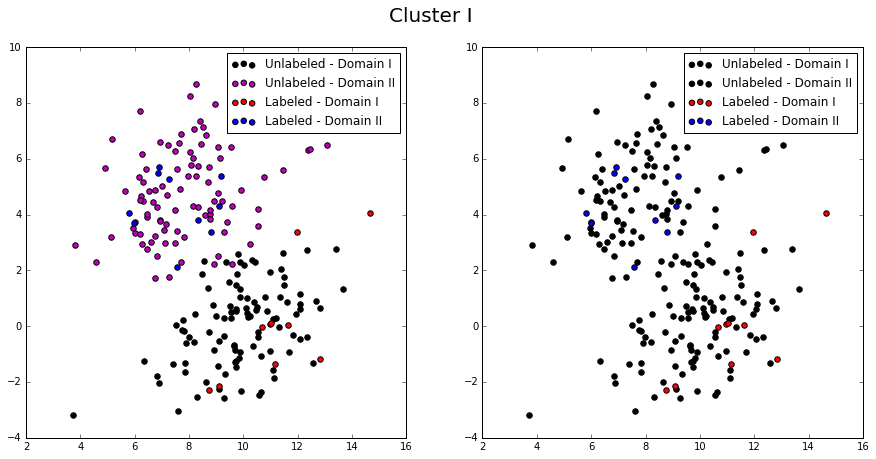

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


# plot the first cluster
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,7))

# cluster I
ax[0].scatter(U1class1[:,0], U1class1[:, 1], 
              marker='o', c='k', s=30, 
              label='Unlabeled - Domain I')
ax[0].scatter(U1class2[:,0], U1class2[:, 1], 
              marker='o', c='m', s=30, 
              label='Unlabeled - Domain II')
ax[0].scatter(X1class1[:,0], X1class1[:, 1],
              marker='o', c='r', s=30, 
              label='Labeled - Domain I')
ax[0].scatter(X1class2[:,0], X1class2[:,1], 
              marker='o', c='b', s=30, 
              label='Labeled - Domain II')
ax[0].legend()

# cluster II

ax[1].scatter(U1class1[:,0], U1class1[:, 1], 
              marker='o', c='k', s=30, 
              label='Unlabeled - Domain I')
ax[1].scatter(U1class2[:,0], U1class2[:, 1], 
              marker='o', c='k', s=30, 
              label='Unlabeled - Domain II')
ax[1].scatter(X1class1[:,0], X1class1[:, 1],
              marker='o', c='r', s=30, 
              label='Labeled - Domain I')
ax[1].scatter(X1class2[:,0], X1class2[:,1], 
              marker='o', c='b', s=30, 
              label='Labeled - Domain II')
ax[1].legend()
plt.suptitle('Cluster I', size=20)
plt.show()

### Domain II

In [6]:
# mean1 = np.array([3, -1], dtype='float')
# mean2 = np.array([3,-2], dtype='float')
# cov = np.array(([1, .9], [.9, 1]), dtype='float')
mean1 = [20,17]
mean2 = [25, 20]
cov = [[2.5, .9], [.9, 2.5]]

# Generate the labeled samples
X2class1 = np.random.multivariate_normal(mean1, cov, size=N)
X2class2 = np.random.multivariate_normal(mean2, cov, size=N)
X2 = np.vstack((X1class1, X1class2))
Y2class1 = np.ones(N)
Y2class2 = 2*np.ones(N)
Y2 = np.concatenate((Y2class1, Y2class2),)

# generate unlabeled samples
U2class1 = np.random.multivariate_normal(mean1,cov,size=U)
U2class2 = np.random.multivariate_normal(mean2,cov,size=U)
U2 = np.concatenate((U1class1, U1class2),)
YU2class1 = np.zeros(U, dtype='float')
YU2class2 = np.zeros(U, dtype='float')
YU2 = np.concatenate((YU1class1, YU1class2),)

# generate testing data
XT2class1 = np.random.multivariate_normal(mean1, cov, T)
XT2class2 = np.random.multivariate_normal(mean2, cov, T)
XT2 = np.concatenate((XT2class1, XT2class2),)

YT2class1 = np.ones(T, dtype='float')
YT2class2 = 2*np.ones(T, dtype='float')
YT2 = np.concatenate((YT2class1, YT2class2),)
print('Different class labels:')
print np.unique(YT2)

Different class labels:
[ 1.  2.]


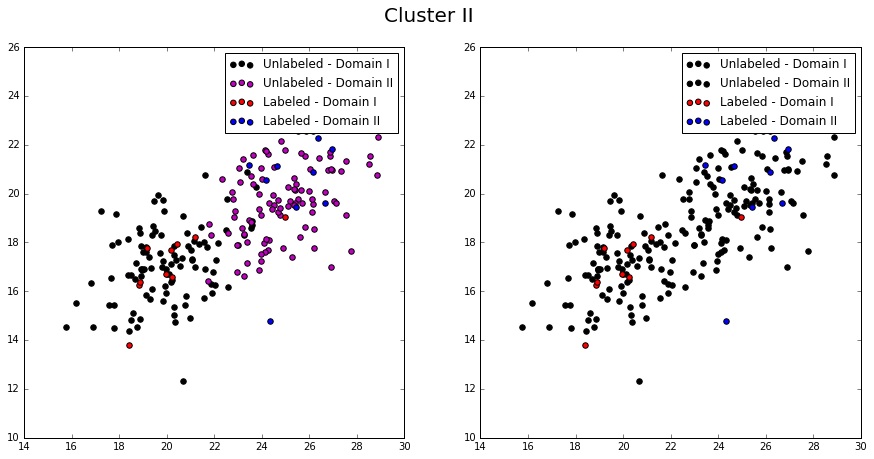

In [7]:
# plot the first cluster
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,7))

# cluster I
ax[0].scatter(U2class1[:,0], U2class1[:, 1], 
              marker='o', c='k', s=30, 
              label='Unlabeled - Domain I')
ax[0].scatter(U2class2[:,0], U2class2[:, 1], 
              marker='o', c='m', s=30, 
              label='Unlabeled - Domain II')
ax[0].scatter(X2class1[:,0], X2class1[:, 1],
              marker='o', c='r', s=30, 
              label='Labeled - Domain I')
ax[0].scatter(X2class2[:,0], X2class2[:,1], 
              marker='o', c='b', s=30, 
              label='Labeled - Domain II')
ax[0].legend()

# cluster II

ax[1].scatter(U2class1[:,0], U2class1[:, 1], 
              marker='o', c='k', s=30, 
              label='Unlabeled - Domain I')
ax[1].scatter(U2class2[:,0], U2class2[:, 1], 
              marker='o', c='k', s=30, 
              label='Unlabeled - Domain II')
ax[1].scatter(X2class1[:,0], X2class1[:, 1],
              marker='o', c='r', s=30, 
              label='Labeled - Domain I')
ax[1].scatter(X2class2[:,0], X2class2[:,1], 
              marker='o', c='b', s=30, 
              label='Labeled - Domain II')
ax[1].legend()
plt.suptitle('Cluster II', size=20)
plt.show()

### Deformations to the Data

In [8]:
deformations = 'square'
# Options: 'mirror', 'square'

if deformations == 'square':
    X1[0,:] = X1[0,:]**-1
    U1[0,:] = U1[0,:]**-1
    XT1[0,:] = XT1[0,:]**-1
elif deformations == 'mirror':
    X1[0,:] = X1[0,:]**2
    U1[0,:] = U1[0,:]**2
    XT1[0,:] = XT1[0,:]**2

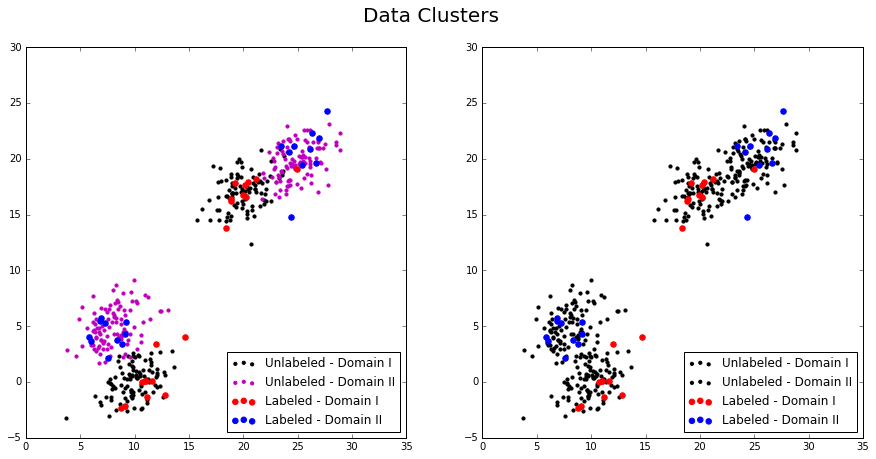

In [9]:
# concatentate them by class
X1 = np.concatenate((X1class1, X2class1),)
U1 = np.concatenate((U1class1, U2class1),)

X2 = np.concatenate((X1class2, X2class2),)
U2 = np.concatenate((U1class2, U2class2),)

# plot them
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax[0].scatter(U1[:,0], U1[:,1],
              marker='o', color='k', s=10,
              label='Unlabeled - Domain I')
ax[0].scatter(U2[:,0], U2[:,1],
              marker='o', color='m', s=10,
              label='Unlabeled - Domain II')
ax[0].scatter(X1[:,0], X1[:,1], 
              marker='o', color='r', s=30, 
              label='Labeled - Domain I')
ax[0].scatter(X2[:,0], X2[:,1],
              marker='o', color='b', s=30,
              label='Labeled - Domain II')

ax[0].legend(loc='lower right')

ax[1].scatter(U1[:,0], U1[:,1],
              marker='o', color='k', s=10,
              label='Unlabeled - Domain I')
ax[1].scatter(U2[:,0], U2[:,1],
              marker='o', color='k', s=10,
              label='Unlabeled - Domain II')
ax[1].scatter(X1[:,0], X1[:,1], 
              marker='o', color='r', s=30, 
              label='Labeled - Domain I')
ax[1].scatter(X2[:,0], X2[:,1],
              marker='o', color='b', s=30,
              label='Labeled - Domain II')

ax[1].legend(loc='lower right')

plt.suptitle('Data Clusters', fontsize=20)
plt.show()

#### Get Dimensions of the Data

In [10]:
d1, n1 = X1.shape[0], X1.shape[1]
d2, n2 = X2.shape[0], X2.shape[1]

n = n1 + n2; d = d1 + d2
print('Size of dimension in domain 1: {s}'.format(s=n1))
print 'Size of n (dimension of all data):', n
print 'Size of d (length of all labeled data):', d

Size of dimension in domain 1: 2
Size of n (dimension of all data): 4
Size of d (length of all labeled data): 40


## Manifold Alignment

##### Convert Matrices into Block Diagonal Matrices

In [11]:
from scipy.linalg import block_diag
X1_block = np.concatenate((X1class1, X1class2, U1class1, U1class2),)
X2_block = np.concatenate((X2class1, X2class2, U2class1, U2class2),)
Z = block_diag(X1_block,
               X2_block)

print 'Shape of Matrix X2', np.shape(X1_block)
print 'Shape of Matrix U2', np.shape(X2_block)
print 'Shape of Block Matrix Z:', np.shape(Z)

Shape of Matrix X2 (220, 2)
Shape of Matrix U2 (220, 2)
Shape of Block Matrix Z: (440, 4)


#### Find the Laplacian Graph of the Data

###### Geometric Graph Laplacian

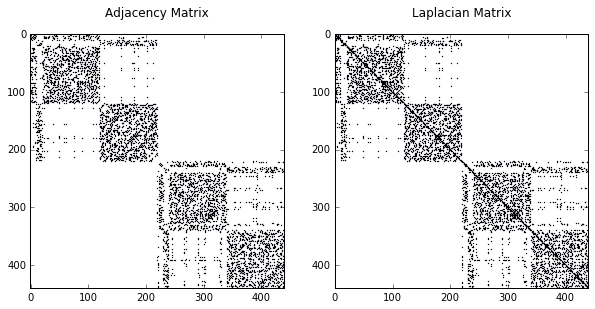

In [12]:
from utils.graph_construction import compute_adjacency, create_laplacian

neighbors = 10

W1 = compute_adjacency(X1_block,n_neighbors=10)
W2 = compute_adjacency(X2_block,n_neighbors=10)

W = block_diag(W1.toarray(),W2.toarray())

Lg, Dg = create_laplacian(W)

# plot the matrix
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].spy(W, precision=1E-12, markersize=.75)
ax[1].spy(Lg, precision=1E-12, markersize=.75)
ax[0].set_title('Adjacency Matrix')
ax[1].set_title('Laplacian Matrix')
ax[0].tick_params(labelbottom='on', labeltop='off')
ax[1].tick_params(labelbottom='on', labeltop='off')
plt.show()

In [13]:
from time import time as time
from scipy.sparse import csgraph


print('Timing my laplacian function...')
%timeit create_laplacian(W1)
print('Timing scipy laplacian function...')
%timeit csgraph.laplacian(W1)

Timing my laplacian function...
1000 loops, best of 3: 414 µs per loop
Timing scipy laplacian function...
1000 loops, best of 3: 982 µs per loop


#### Class Graph Laplacian

##### Weighted Similar Matrix

In [14]:
Y = np.concatenate((np.concatenate((Y1class1, Y1class2, YU1class1, YU1class2)),
                    np.concatenate((Y2class1, Y2class2, YU2class1, YU2class2))))
Y = Y[:,np.newaxis]
print 'Shape of Y', Y.shape
print 'Shape of Y[:,]', Y[:,].shape


Shape of Y (440, 1)
Shape of Y[:,] (440, 1)


The matrices are the same? True


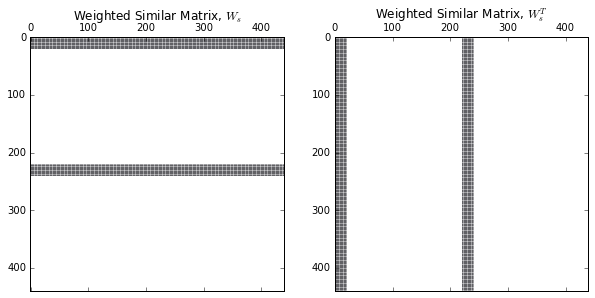

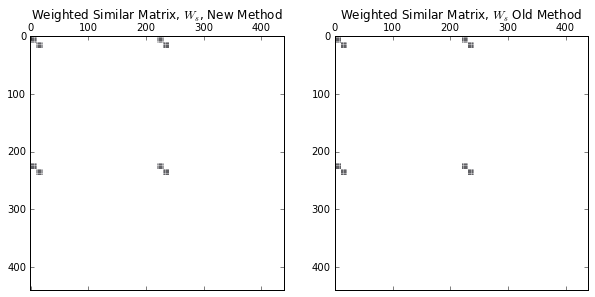

In [15]:
# new method for constructing the matrix
Ws1 = np.repeat(Y, Y[:,].shape[0], axis=1)
Ws2 = np.repeat(Y, Y[:,].shape[0], axis=1).T
Ws = np.zeros(np.shape(Ws1), dtype='int')
indices = np.where((Ws1==Ws2) & (Ws1>0) & (Ws2>0))
Ws[indices] = 1

# old method for constructing the matrix
Ws_old = np.repeat(Y, Y[:,].shape[0], axis=1) == \
        np.repeat(Y, Y[:,].shape[0], axis=1).T
Ws_old[Y[:,0]==0,:] = 0; Ws_old[:,Y[:,0]==0] = 0

# check if they are equal methods
print('The matrices are the same? {n}'.format(n=np.array_equal(Ws, Ws_old)))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                              figsize=(10,8))

ax1.spy(Ws1, precision=1E-10, markersize=.1)
ax1.set_title('Weighted Similar Matrix, $W_{s}$')
ax2.spy(Ws2, precision=1E-10, markersize=.1)
ax2.set_title('Weighted Similar Matrix, $W_{s}^{T}$')

plt.show()


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                              figsize=(10,8))

ax1.spy(Ws, precision=1E-10, markersize=.1)
ax1.set_title('Weighted Similar Matrix, $W_s$, New Method')
ax2.spy(Ws_old, precision=1E-10, markersize=.1)
ax2.set_title('Weighted Similar Matrix, $W_s$ Old Method')

plt.show()

##### Weighted Dissimilar Matrix

The matrices are the same? True


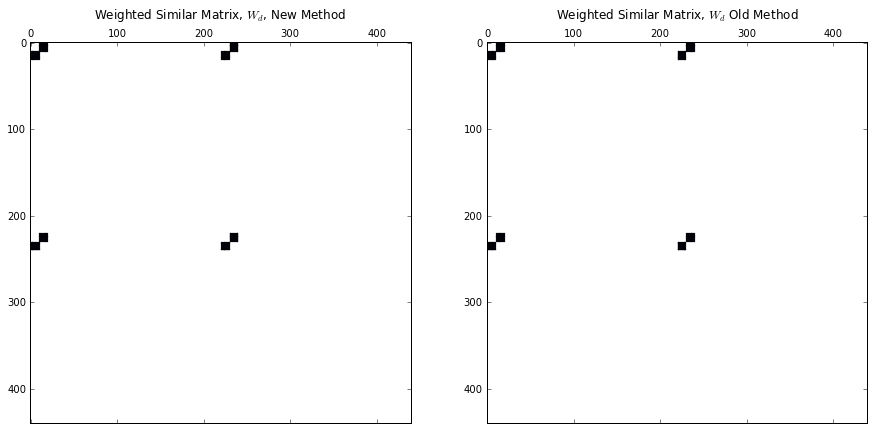

In [16]:
# new method for constructing the dissimilarity matrix
Wd1 = np.repeat(Y, Y[:,].shape[0], axis=1)
Wd2 = np.repeat(Y, Y[:,].shape[0], axis=1).T

Wd = np.zeros(np.shape(Wd1), dtype='int')
indices = np.where((Wd1!=Wd2) & (Wd1>0) & (Wd2>0))
Wd[indices] = 1

# old method for constructing the dissimilarity matrices
Wd_old = np.repeat(Y, Y[:,].shape[0], axis=1) != \
        np.repeat(Y, Y[:,].shape[0], axis=1).T
Wd_old[Y[:,-1]==0,:] = 0
Wd_old[:,Y[:,-1]==0] = 0
Wd_old = np.double(Wd)


# check if they are equal methods
print('The matrices are the same? {n}'.format(n=np.array_equal(Wd, Wd_old)))


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                              figsize=(15,7))

ax1.spy(Wd, precision=1E-10, markersize=.75)
ax1.set_title('Weighted Similar Matrix, $W_d$, New Method')
ax2.spy(Wd_old, precision=1E-10, markersize=.75)
ax2.set_title('Weighted Similar Matrix, $W_d$ Old Method')

plt.show()

#### Laplacian Matrix

(440, 1)
The Weighted Adjacency Matrices shapes
(440, 440) (440, 440)
The Degree Vector shapes
(440, 440) (440, 440)
The Laplacian Matrices shapes
(440, 440) (440, 440)


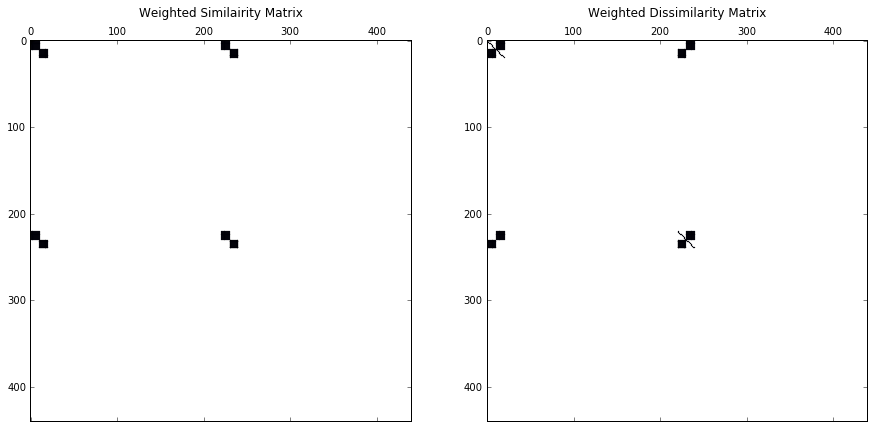

In [17]:
# Calculate the Degree from the weighted matrix
Ds = np.sum(Ws, axis=1); Dd = np.sum(Ws, axis=1)
Ds = np.diag(Ds, k=0); Dd = np.diag(Dd, k=0)

# Calculate the Laplacian weighted matrices
Ls = Ds - Ws; Ld = Dd - Wd

print Y.shape
print 'The Weighted Adjacency Matrices shapes\n', Ws.shape, Wd.shape
print 'The Degree Vector shapes\n', Ds.shape, Dd.shape
print 'The Laplacian Matrices shapes\n',Ls.shape, Ld.shape

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                              figsize=(15,7))

ax1.spy(Ls, precision=1E-10, markersize=.75)
ax1.set_title('Weighted Similairity Matrix')
ax2.spy(Ld, precision=1E-10, markersize=.75)
ax2.set_title('Weighted Dissimilarity Matrix')

plt.show()

#### Tuning the Generalized Eigenvalue Problem

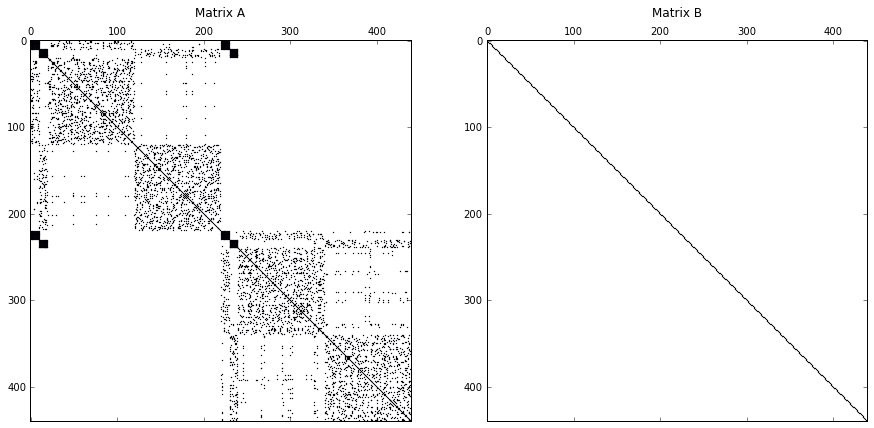

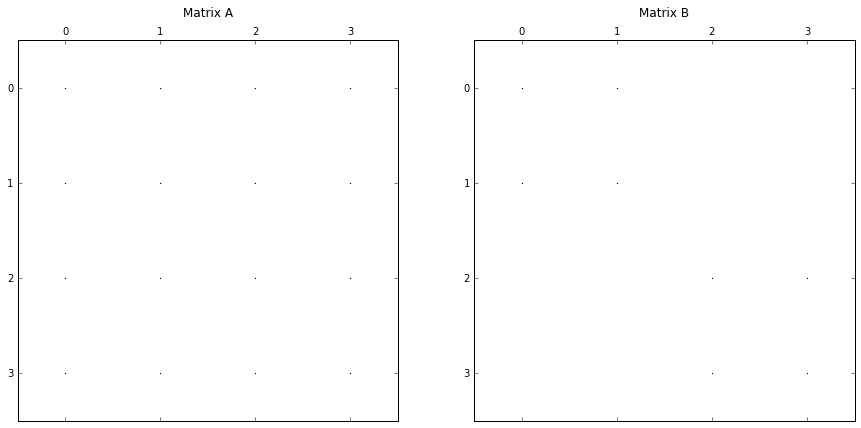

In [18]:
mu = .9
A = Lg + mu * Ls
B = Dg.toarray() #+ Ld

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                              figsize=(15,7))

ax1.spy(A, precision=1E-10, markersize=.75)
ax1.set_title('Matrix A')
ax2.spy(B, precision=1E-10, markersize=.75)
ax2.set_title('Matrix B')

plt.show()

# Normalized Eigenvalue Problem
A_norm = np.dot(np.dot(Z.T, A),Z)
B_norm = np.dot(np.dot(Z.T, B),Z)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                              figsize=(15,7))

ax1.spy(A_norm, precision=1E-10, markersize=.75)
ax1.set_title('Matrix A')
ax2.spy(B_norm, precision=1E-10, markersize=.75)
ax2.set_title('Matrix B')

plt.show()


#### Extract all Features

Help with tuples [here][1].
Help with the eigenvalue function (non-sparse) - [here][2], and [here][3].

[1]: http://www.tutorialspoint.com/python/python_tuples.htm
[2]: http://stackoverflow.com/questions/24752393/numpy-generalized-eigenvalue-probiem
[3]: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html#scipy.linalg.eigh

#### Normalized Eigenvalue Problem

In [19]:
import scipy.sparse as sparse
from scipy.linalg import eigh, eigvalsh
from scipy.linalg import eig
from scipy.sparse.linalg import eigsh

# Solve using the normalized generalized eigenvalue problem
eig_vals, eig_vecs = eigh(a=A_norm, 
                         b=B_norm,
                         eigvals_only=False,
                         eigvals=(0,n-1),
                         type=1)
#eig_vals, eig_vecs = eigsh(A=A_norm,
#                          M=B_norm,
#                          k=1,
#                          which='SM')
print 'Eigenvalues:\n', eig_vals
print 'Eigenvectors:\n', eig_vecs

Eigenvalues:
[ 0.00787602  0.18041775  0.26316989  0.39364106]
Eigenvectors:
[[-0.00171266  0.00234286  0.00203647 -0.00048342]
 [-0.00105434 -0.00911351  0.00046384  0.00136186]
 [-0.00054473 -0.0021442  -0.00138553 -0.01429866]
 [-0.000355    0.00268896  0.00075328  0.01746293]]


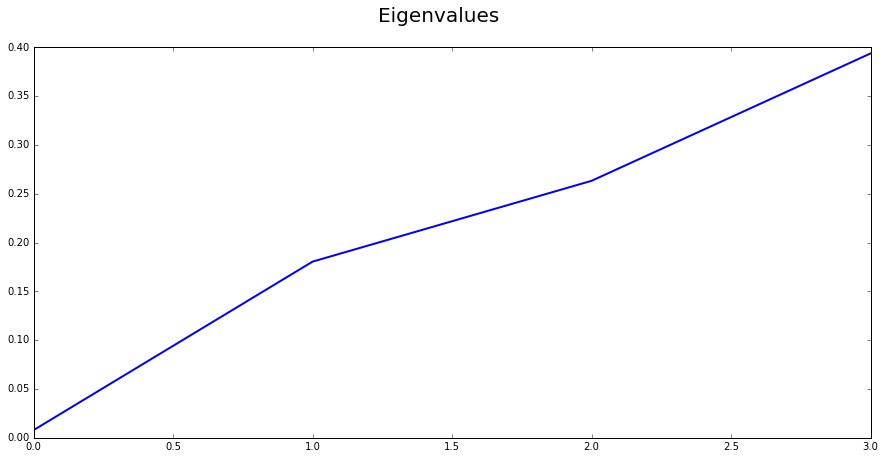

In [20]:
# plot the eigenvalues
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(eig_vals, linewidth=2, label='Laplacian')
plt.suptitle('Eigenvalues', fontsize=20)
plt.show()

### Project the Data

In [21]:
Nf = n

E1 = eig_vecs[:n1, :Nf]; E2 = eig_vecs[n1:, :Nf]

print 'Eigenvectors for block1\n', eig_vecs[:n1, :Nf]
print 'Eigenvectors for block2\n', eig_vecs[n1:, :Nf]

Eigenvectors for block1
[[-0.00171266  0.00234286  0.00203647 -0.00048342]
 [-0.00105434 -0.00911351  0.00046384  0.00136186]]
Eigenvectors for block2
[[-0.00054473 -0.0021442  -0.00138553 -0.01429866]
 [-0.000355    0.00268896  0.00075328  0.01746293]]


#### Project the Training Samples

In [22]:
print 'Shape of E1', E1.shape
print 'Shape of X1', X1.shape
X1toF = np.dot(E1.T, X1.T)
X2toF = np.dot(E2.T, X2.T)
print 'Shape of X1toF:', X1toF.shape
print 'Shape of X2toF:', X2toF.shape

Shape of E1 (2, 4)
Shape of X1 (20, 2)
Shape of X1toF: (4, 20)
Shape of X2toF: (4, 20)


#### Project Test Samples

In [23]:
print 'Shape of E1', E1.shape
print 'Shape of XT1', XT1.shape
XT1toF = np.dot(E1.T, XT1.T)
XT2toF = np.dot(E2.T, XT2.T)

Shape of E1 (2, 4)
Shape of XT1 (500, 2)


## Plot Projection

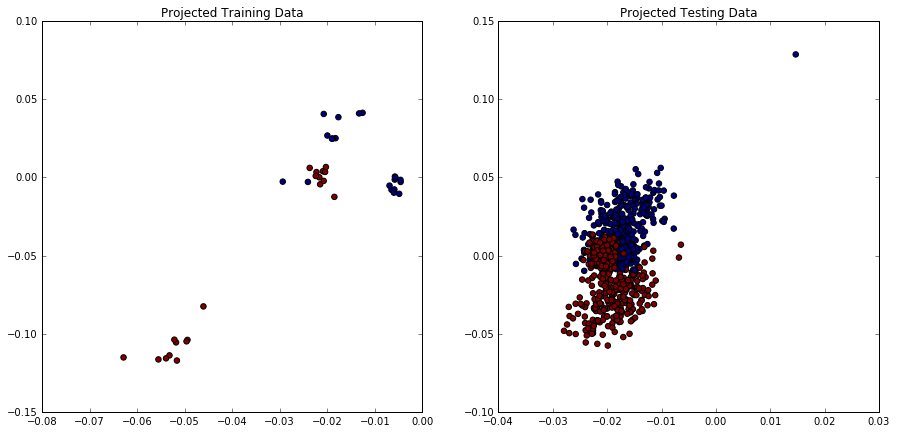

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))


ax[0].scatter(X1toF.T[:,0], X1toF.T[:,1], marker='o', s=30, c=Y1)
ax[0].scatter(X2toF.T[:,0], X2toF.T[:,1], marker='o', s=30, c=Y2)
ax[0].set_title('Projected Training Data')

ax[1].scatter(XT1toF.T[:,0], XT1toF.T[:,1], s=30, c=YT1)
ax[1].scatter(XT2toF.T[:,0], XT2toF.T[:,1], s=30, c=YT2)
ax[1].set_title('Projected Testing Data')

plt.show()

## Classification Using LDA

#### Test Case Projection

In [25]:
print(np.shape(YT1), np.shape(XT1))

((500,), (500, 2))


In [26]:
# Combine Training and Testing Data
X_trainp = np.concatenate((X1toF.T, X2toF.T))
y_train = np.concatenate((Y1, Y2))
X_testp = np.concatenate((XT1toF.T, XT2toF.T))
y_test = np.concatenate((YT1, YT2))

In [27]:
from sklearn.lda import LDA

lda = LDA()
lda.fit(X_trainp, y_train)
y_predp = lda.predict(X_testp)

/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


## Plot Results

#### Error Statistics

[[250 250]
 [250 250]]
Classification Report:
             precision    recall  f1-score   support

        1.0       0.50      0.50      0.50       500
        2.0       0.50      0.50      0.50       500

avg / total       0.50      0.50      0.50      1000



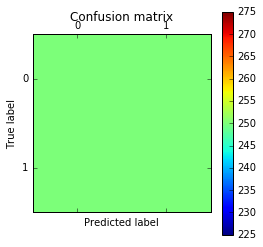

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_predp)

print(cm)
print 'Classification Report:\n', classification_report(y_test,
                                                     y_predp)


# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### Plot Domain


In [29]:
print XT1toF.T.shape
print YT1.shape
print XT2toF.T.shape
print YT2.shape

(500, 4)
(500,)
(500, 4)
(500,)


#### Test Case II - Not projected

[[250 250]
 [250 250]]
Classification Report:
             precision    recall  f1-score   support

        1.0       0.50      0.50      0.50       500
        2.0       0.50      0.50      0.50       500

avg / total       0.50      0.50      0.50      1000



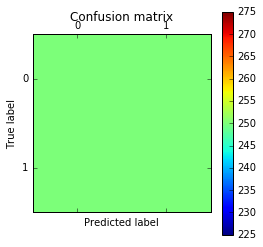

In [30]:
# Combine Training and Testing Data
X_train = np.vstack((X1, X2))
X_test = np.vstack((XT1, XT2))


from sklearn.lda import LDA

lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
print 'Classification Report:\n', classification_report(y_test,
                                                     y_pred)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Plot Domain

In [31]:
print np.unique(YT1)
print np.unique(YT2)
print XT1.shape, YT1.shape
print XT2.shape, YT2.shape

[ 1.  2.]
[ 1.  2.]
(500, 2) (500,)
(500, 2) (500,)


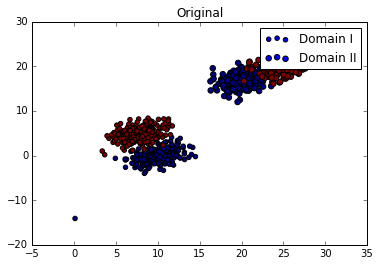

In [32]:
plt.figure()
plt.scatter(XT1[:,0], XT1[:,1], s=20, c=YT1)
plt.scatter(XT2[:,0], XT2[:,1], s=30, c=YT2)
plt.title('Original')
plt.legend(['Domain I', 'Domain II'])
plt.show()